# Exercise 3: Part B

This exercise relates to the *Auto* data set which can be found in `../datasets/Auto.csv` file as a _csv_ file.

It contains a number of variables for 392 vehicles.


The variables are:

* `mpg`: Miles per gallon
* `cylinders`: Number of cylinders; between 4 and 8
* `displacement`: Engine displacement in cubic inches
* `horsepower`: Engine horsepower
* `weight`: Vehicle weight in lbs.
* `acceleration`: Time to accelerate from 0 to 60 mph in seconds
* `year`: Model year, modulo 100
* `origin`: Origin of car; 1 = American, 2 = European, 3 = Japanese
* `name`: Vehicle name

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
from sklearn.metrics import accuracy_score


## Task 1: Load the file

Create a binary variable, “mpg01”, that contains a 1 if “mpg” contains a value above its median, and a 0 if “mpg” contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both “mpg01” and the other “Auto” variables.


In [2]:
### BEGIN SOLUTION
def task1_get_data():
    df = pd.read_csv("../data/Auto.csv")
    df = df.loc[df["horsepower"].str.isnumeric()]
    medianCol = df.loc[:,'mpg'].median()
    df['median'] = np.where(df['mpg'] > medianCol, 1, 0)
    return df
### END SOLUTION

In [3]:
### BEGIN SOLUTION
data = task1_get_data()
### END SOLUTION

## Task 2: Investigate the data

Explore the data graphically in order to investigate the association between “mpg01” and the other features. Which of the other features seem most likely to be useful in predictiong “mpg01” ? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

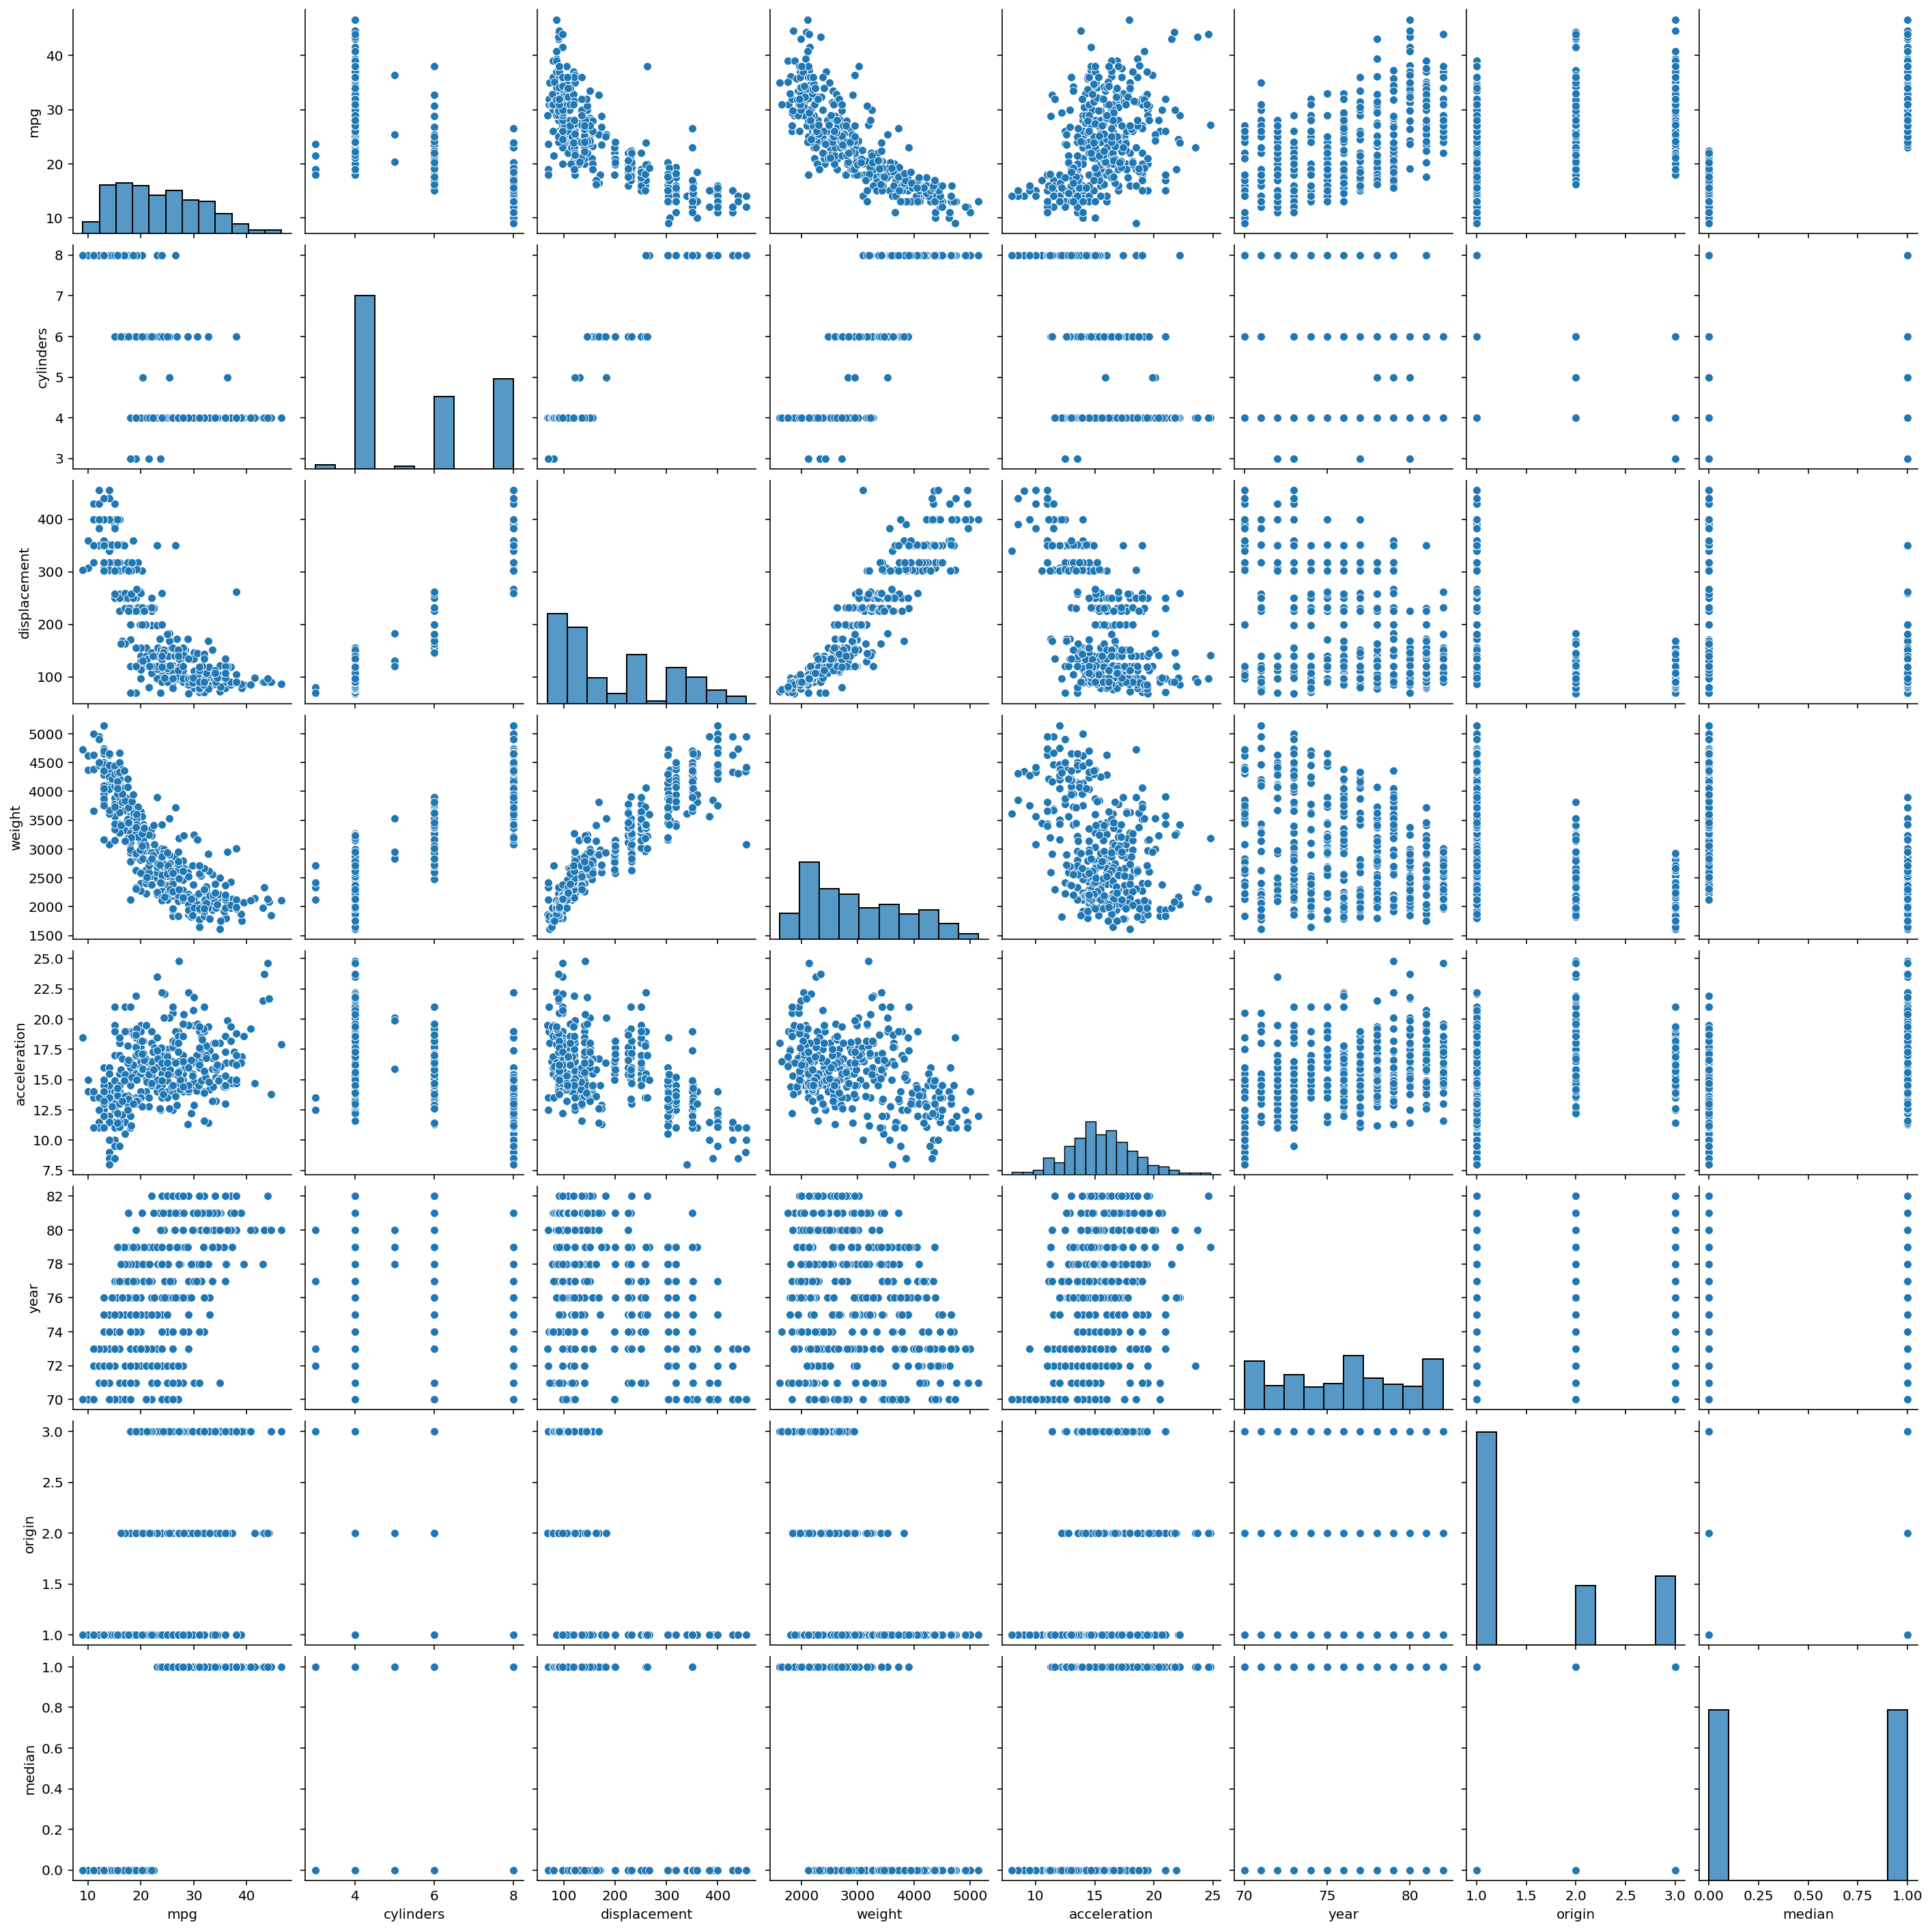

In [4]:
#Seems to correlate with weight
sns.pairplot(data)

<AxesSubplot:xlabel='weight'>

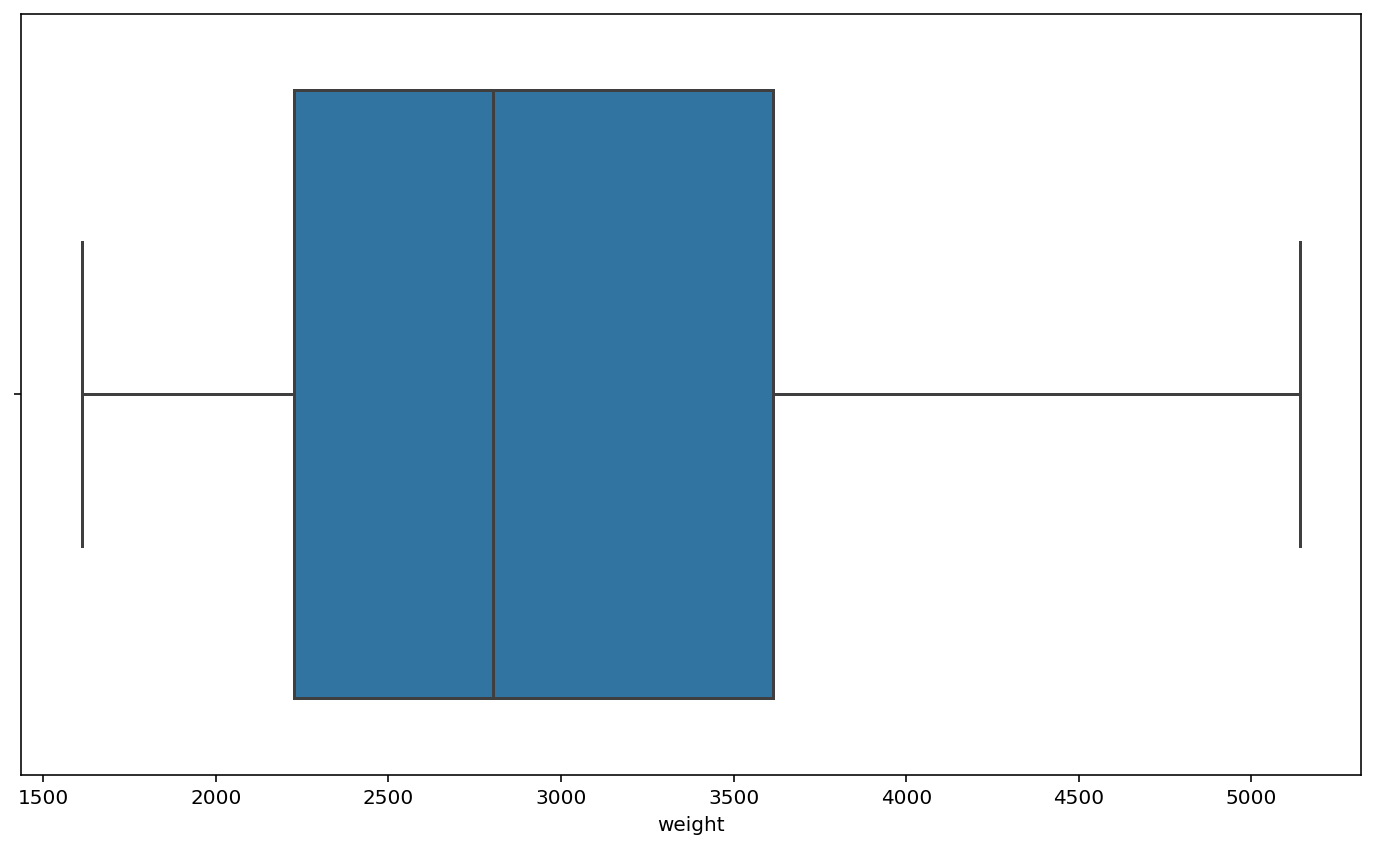

In [5]:
sns.boxplot(x=data['weight'])

<AxesSubplot:xlabel='mpg'>

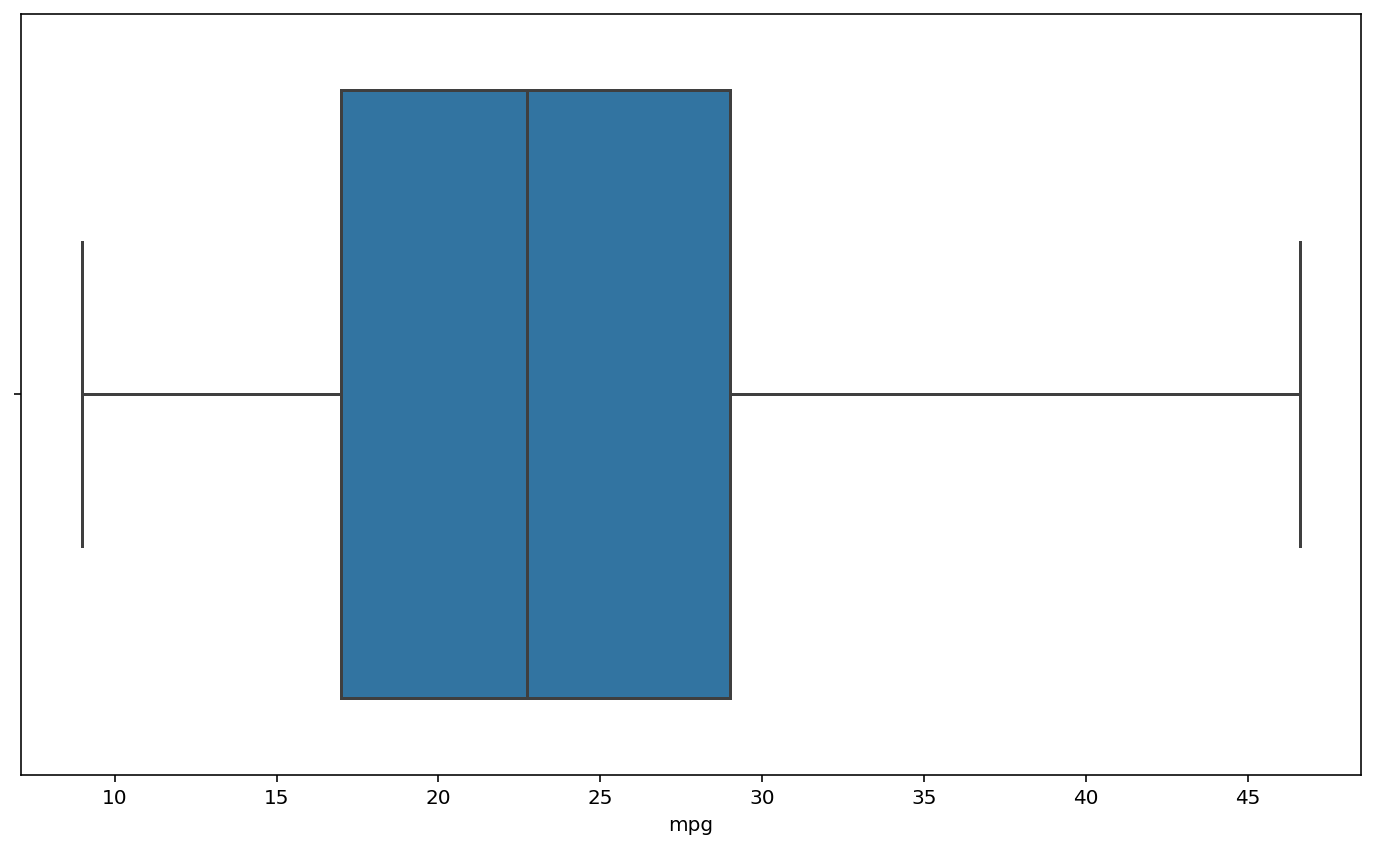

In [6]:
sns.boxplot(x=data['mpg'])

## Task 3: Training and Test set

Split the data into a training set and a test set.

In [8]:
from sklearn.model_selection import train_test_split

#x = data.loc[:, data.columns != 'mpg']
x = pd.DataFrame(data, columns =['displacement', 'weight', 'cylinders','horsepower'])
y = data['median']

#df["price1"] = df["price1"].round(4).apply(str)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.7)

## Question 3

What is the ideal ratio for the training/test split?

* (A) 70/30
* (B) 80/20
* (C) 50/50
* (D) It depends on the data and the problem. It's not possible to give a universally correct answer.

In [24]:
answer_3 = "D"   # enter your answer inside the string quotes

## Task 4: Training and testing LDA

Perform LDA on the training data in order to predict “mpg01” using the variables that seemed most associated with “mpg01” in task 2. What is the test error of the model obtained?

<h5>My solution should be correct - score returns accuracy. Score differes every time the train/test split method is executed</h5>

In [12]:
def trainAndTest(algo):
    clf = algo
    clf.fit(x_train,y_train)
    return clf.score(X=x_train,y=y_train)

In [10]:
print(trainAndTest(LinearDiscriminantAnalysis()))

0.905982905982906


## Task 5: Logistic Regression and Accuracy

Repeat task 5, but this time use QDA.

In [11]:
print(trainAndTest(QuadraticDiscriminantAnalysis()))

0.9230769230769231


## Task 6: LDA

Repeat task 4, but this time use Logistic Regression.

In [19]:
print(trainAndTest(LogisticRegression()))

0.8974358974358975


## Task 7: kNN

Repeat task 4, but this time use kNN with different values for k.

In [21]:
print(trainAndTest(KNeighborsClassifier()))

0.9230769230769231


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
